In [1]:
# Is there evidence of personality types based on the data of these research participants? 
# If so, characterize these types both quantitatively and narratively.

# 1. Load the personality questions

In [73]:
# 0. init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

In [74]:
# 1. Load the personality questions
df = pd.read_csv('movieReplicationSet.csv', sep=',')
personality = df.iloc[:,420:464] # personality questions 
personality = personality.dropna() # drop NaN values
personality

,Is talkative,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,...,Prefers work that is routine,is outgoing/sociable,Is sometimes rude to others,Makes plans and follows through with them,Gets nervous easily,Likes to reflect/play with ideas,Has few artistic interests,Likes to cooperate with others,Is easily distracted,Is sophisticated in art or music or literature
1,2.0,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,...,4.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0,2.0,3.0
2,4.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,...,2.0,3.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0,3.0
3,5.0,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,5.0,...,3.0,3.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
4,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0
5,1.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,3.0,...,2.0,1.0,2.0,2.0,5.0,1.0,1.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,2.0,5.0,...,4.0,3.0,2.0,5.0,4.0,4.0,2.0,4.0,3.0,4.0
1093,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,4.0,...,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0
1094,4.0,2.0,5.0,4.0,2.0,5.0,5.0,1.0,2.0,5.0,...,4.0,4.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0
1095,4.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,...,3.0,2.0,2.0,3.0,5.0,4.0,2.0,4.0,4.0,5.0


In [75]:
# 2. Exploring data frames
predictors = personality.to_numpy()
predictors

array([[2., 3., 4., ..., 3., 2., 3.],
       [4., 2., 4., ..., 5., 3., 3.],
       [5., 3., 5., ..., 4., 4., 4.],
       ...,
       [4., 2., 5., ..., 5., 1., 5.],
       [4., 2., 4., ..., 4., 4., 5.],
       [5., 4., 5., ..., 5., 3., 5.]])

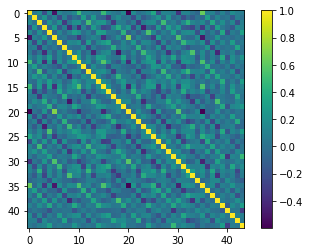

In [76]:
# 3. Correlation Heatmap
r = np.corrcoef(predictors,rowvar=False)
plt.imshow(r) 
plt.colorbar()
plt.show()

In [77]:
# 4. Scaling and centering the data before PCA
zscoredData = stats.zscore(predictors)

In [78]:
# 5. PCA
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_ # eigenvalues
loadings = pca.components_*-1 # loadings
pcaData = pca.fit_transform(zscoredData)*-1 # rotated data

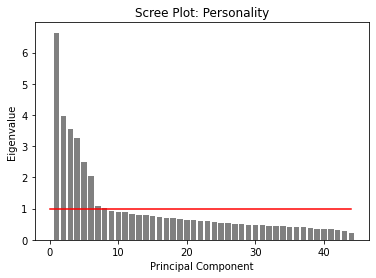

In [79]:
# 6. Screeplot and choosing the factors
numPredictors = 44
x = np.linspace(1, numPredictors, numPredictors)
plt.bar(x, eigVals, color='gray')
plt.plot([0, numPredictors],[1,1],color='red') 
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Component')
plt.title('Scree Plot: Personality')
plt.show()

In [80]:
# 6a. Choosing criterion

# 1) Kaiser criterion: Keep all factors with an eigenvalue > 1
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest drop
print('Number of factors selected by elbow criterion: 6')

# 3) Number of factors that account for 90% of the variance
threshold = 50
eigSum = np.cumsum(eigVals/sum(eigVals)*100)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

Number of factors selected by Kaiser criterion: 8
Number of factors selected by elbow criterion: 6
Number of factors to account for at least 90% variance: 7


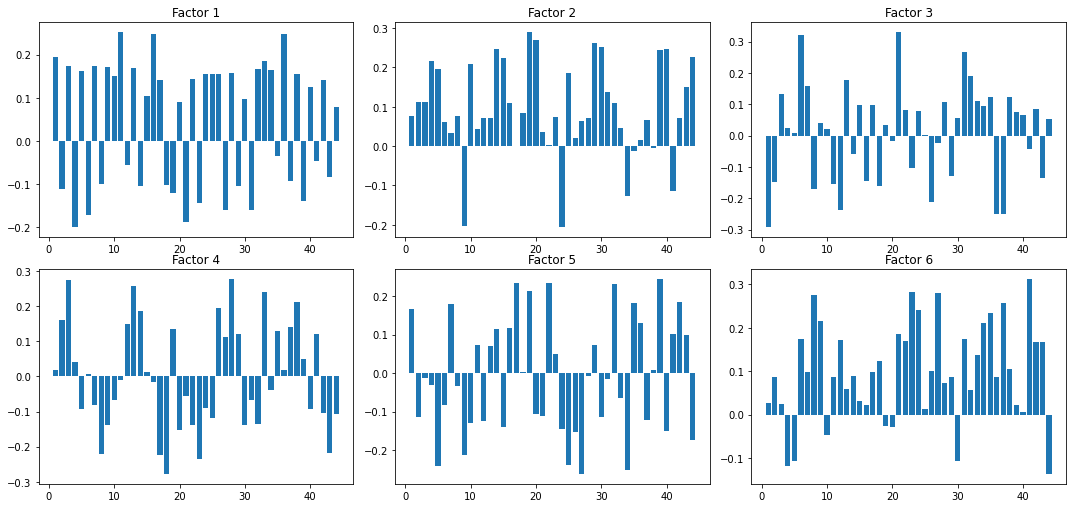

In [81]:
# 7. Interpreting the factors by plotting
fig,ax = plt.subplots(2,3,figsize=(15,7))
fig.tight_layout()

ax[0, 0].bar(x,loadings[0,:])
ax[0, 0].set_title('Factor 1')

ax[0, 1].bar(x,loadings[1,:])
ax[0, 1].set_title('Factor 2')

ax[0, 2].bar(x,loadings[2,:])
ax[0, 2].set_title('Factor 3')

ax[1, 0].bar(x,loadings[3,:])
ax[1, 0].set_title('Factor 4')

ax[1, 1].bar(x,loadings[4,:])
ax[1, 1].set_title('Factor 5')

ax[1, 2].bar(x,loadings[5,:])
ax[1, 2].set_title('Factor 6')


plt.show()

In [87]:
pcaData[:,0]

array([-2.06957800e+00, -1.30241202e-01,  1.71768502e+00, -2.07258012e+00,
       -6.63363255e+00, -3.27033002e+00, -1.98331724e+00,  1.42726629e-01,
        2.88869436e+00,  7.06854865e-01,  2.26625161e-01, -4.75974129e-01,
        2.22185422e+00, -1.41942579e+00,  3.91426042e-01, -2.04137166e-01,
        3.17026602e+00, -2.33041654e-01, -3.40949635e+00,  4.02251628e+00,
       -1.50028263e+00, -2.71629774e+00,  4.28013090e+00, -3.33263848e+00,
        3.04199141e+00, -1.87941653e+00, -4.27524417e+00,  1.03489054e+00,
        1.57096378e+00, -7.99413049e-01,  1.23437134e+00,  9.29255466e-01,
        1.35562752e+00, -2.58559523e+00, -4.69620456e+00,  1.51275408e+00,
       -1.58724419e+00, -2.52025330e+00, -2.57805055e+00, -3.65395495e+00,
        2.92483833e+00,  1.98786425e+00,  1.68297591e+00, -1.65852363e-01,
       -5.24738056e+00,  3.62794621e+00,  7.92610296e-01,  1.76353967e+00,
       -2.48328858e+00, -4.90536277e-01, -2.08631559e+00, -2.65278686e-01,
       -1.57208541e+00, -

In [82]:
# 8. Clustering: Store the transformed data - the predictors - as x:


x = np.column_stack((pcaData[:,0],pcaData[:,1], pcaData[:,2],
                    pcaData[:,3], pcaData[:,4], pcaData[:,5]))
x.shape

(1000, 6)

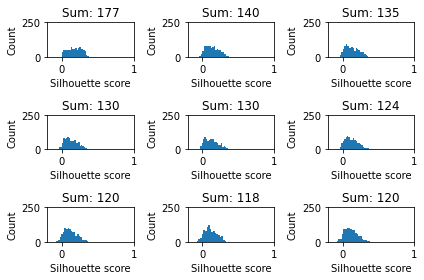

In [83]:
# 9. Siloutte
# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

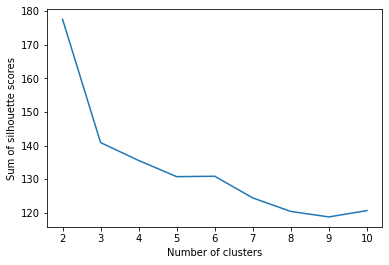

In [84]:
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

In [85]:
# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

cId

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,

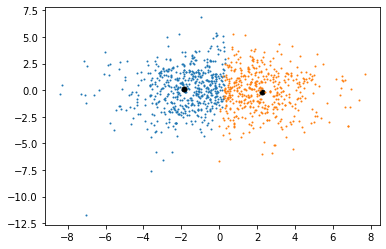

In [86]:
# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  